In [103]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader,random_split

from skimage import io,transform
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt


In [104]:
ac_frame = pd.read_csv('./data/animal_crossing_dataset.csv')[['subreddit','filename']]
doom_frame = pd.read_csv('./data/doom_crossing_dataset.csv')[['subreddit','filename']]


ac_train,ac_test = train_test_split(ac_frame,train_size = .7)
doom_train,doom_test = train_test_split(doom_frame,train_size = .7)

train_frame = pd.concat([ac_train,doom_train])
train_frame.reset_index(inplace = True)

test_frame = pd.concat([ac_test,doom_test])
test_frame.reset_index(inplace = True)
# len(ac_frame)
# len(doom_frame)

In [110]:
class ACDoomDataset(Dataset):
    def __init__(self,pd_frame,root_dir,transform=None):
        self.data_pd = pd_frame
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.data_pd)
    
    def __getitem__(self,index):
        if self.data_pd.iloc[index,1] == 'AnimalCrossing':
            img_name = os.path.join(self.root_dir,'animal_crossing',
                                    self.data_pd.iloc[index,-1])
            label = 0
        else:
            img_name = os.path.join(self.root_dir,'doom',
                                    self.data_pd.iloc[index,-1])
            label = 1

        image = io.imread(img_name)

        if self.transform:
            image = self.transform(image)
        return image,label

In [111]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((400,400)),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ]
)

batch_size = 4

train_dataset = ACDoomDataset(pd_frame = train_frame,root_dir = "./data/",transform= transform)
test_dataset = ACDoomDataset(pd_frame = test_frame,root_dir = "./data/",transform = transform)

train_dataloader = DataLoader(train_dataset,batch_size = 2,shuffle = True)
test_dataloader = DataLoader(test_dataset,batch_size = 2, shuffle = False)



In [118]:
train_images,train_labels = next(iter(train_dataloader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99888027].


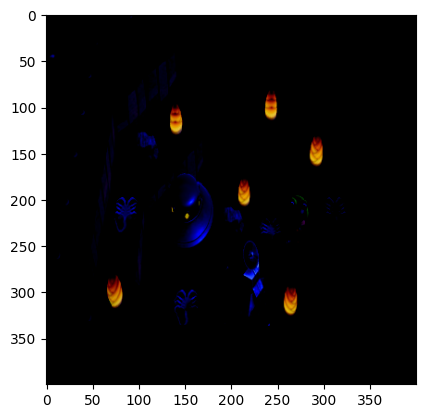

In [119]:
plt.imshow(train_images[1].permute(1,2,0))